# Stochastic stimulation of Lotka Voltera model

Visit: https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations

In [1]:
from __future__ import division
import numpy
import matplotlib.pyplot as plt
import random 
%matplotlib inline

In [5]:
def Gillepse(N,alpha,beta,delta,gamma,tmax):
    MAX = int(1e6)
    TVal = numpy.zeros(MAX,dtype=float)
    PredVal= numpy.zeros(MAX,dtype=int)
    PreyVal=numpy.zeros(MAX,dtype=int)
    count=0    
    #---Initial Conditions-------
    Pred=100
    Prey=350
    t=0
    #---Storing the Values------
    TVal[count]=t
    PredVal[count]=Pred
    PreyVal[count]=Prey
    #----Calculation of the rates--------
    while t < tmax and count < MAX and Prey>0:
        Pred_Kill_Prey= beta*Prey*Pred
        Pred_nat_death=gamma*Pred
        Prey_reprod=alpha*Prey
        Pred_reprod=delta*Prey*Pred
        
        K=Pred_Kill_Prey+Pred_nat_death+Prey_reprod+Pred_reprod #total rate
        
        #-------calculation of dt----------
        dt= -(1.0/K)*numpy.log(random.random())
        
        t=t+dt
        count=count+1
        #----Stochasticity Introduced to take decesion using uniform distribution----------------- 
        r=random.random()*K
        
        if r<Pred_Kill_Prey:
            Prey -= 1
        elif r< Pred_Kill_Prey+Pred_nat_death:
            Pred -=1
        elif r< Pred_Kill_Prey+Pred_nat_death+Prey_reprod:
            Prey += 1
        elif r< Pred_Kill_Prey+Pred_nat_death+Prey_reprod+Pred_reprod:
            Pred +=1
        #print count
        #----Updating values-----
        TVal[count]=t
        PredVal[count]=Pred
        PreyVal[count]=Prey
    TVal[:count]
    PredVal[:count]
    PreyVal[:count]
    print 'Number of events = ',count

#---------Plotting--------------------    
    fig,ax = plt.subplots()
    ax.plot(TVal,PredVal,'b-',label='Predator')
    ax.plot(TVal,PreyVal,'r-',label='Prey')
    ax.set_xlabel('time')
    ax.legend(loc='best')
    plt.show()
    #plt.plot(PredVal,PreyVal)
    #plt.show()
    return None
        

Number of events =  17760


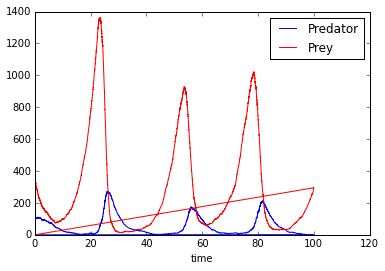

In [6]:
Gillepse(450,0.25,0.005,0.001,0.3,100)